> 1) Reading Data through link

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isna().any()

Hours     False
Scores    False
dtype: bool

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [8]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

> 2) Splitting Data into 80-20

In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=13)

In [11]:
xtrain.shape

(18, 1)

In [12]:
xtest.shape

(7, 1)

In [13]:
ytrain.shape

(18,)

In [14]:
ytest.shape

(7,)

> 3) Using LinearRegression from Sklearn library

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [16]:
pred = lr.predict(xtest)

> 4) seeing the difference in prediction (as we have less data) 

In [17]:
print('Actual   Predicted   Difference')
print('-'*32)

for i in range(len(xtest)):
    print('{:4.0f} {:11.2f} {:11.2f}'.format(ytest[i], pred[i], pred[i]-ytest[i]))

Actual   Predicted   Difference
--------------------------------
  81       81.49        0.49
  86       76.75       -9.25
  47       51.17        4.17
  62       58.75       -3.25
  95       87.17       -7.83
  60       54.96       -5.04
  42       34.12       -7.88


> 5) Matplotlib to visulize the data and prediction

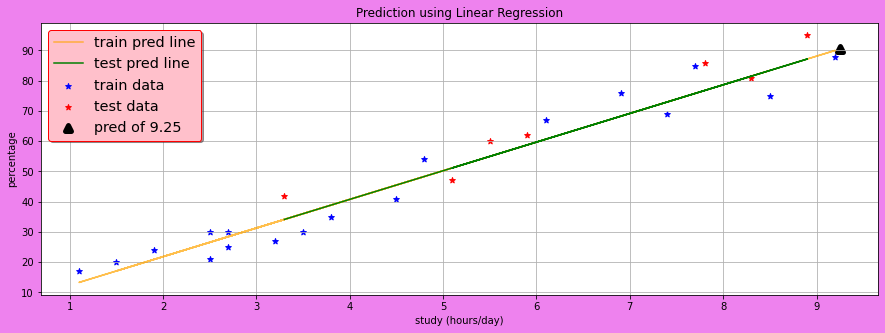

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5), facecolor='violet')
plt.scatter(xtrain, ytrain, c='blue', marker='*', label='train data')
plt.scatter(xtest, ytest, c='red', marker='*', label='test data')

plt.plot(xtrain, lr.predict(xtrain), c='orange', alpha=0.7, label='train pred line')
plt.plot(xtest, lr.predict(xtest), c='green', label='test pred line')

plt.scatter([9.25], lr.predict([[9.25]]), c='black', marker='^', linewidths=5, label='pred of 9.25')

plt.title("Prediction using Linear Regression")
plt.xlabel("study (hours/day)")
plt.ylabel("percentage")
plt.legend(fontsize="x-large", facecolor = 'pink', edgecolor='red', fancybox=True, shadow=True)
plt.grid()
plt.show()

> 6) What will be predicted score if a student studies for 9.25 hrs/ day?

In [19]:
round(lr.predict([[9.25]])[0], 2)

90.49

> 7) Linear Regression metrics

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('MSE  : {:.2f}'.format(mean_squared_error(ytest, pred)))
print('RMSE : {:.2f}'.format(math.sqrt(mean_squared_error(ytest, pred))))
print('MAE  : {:.2f}'.format(mean_absolute_error(ytest, pred)))


MSE  : 37.50
RMSE : 6.12
MAE  : 5.42


In [21]:
from sklearn.metrics import r2_score
print('r2 score          : {:.2f}'.format(r2_score(ytest, pred)))
print('Adjusted r2 score : {:.2f}'.format(1-(1-r2_score(ytest, pred))*((len(xtest)-1)/(len(xtest)-len(xtest[0])-1))))

r2 score          : 0.89
Adjusted r2 score : 0.87
